In [1]:
%cd ~/REVIVAL2

/disk2/fli/REVIVAL2


In [2]:
%load_ext blackcellmagic

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:


COMMON_COLS = [
    "lib",
    "hd",
    "ev_score",
    "esm_score",
    "esmif_score_apo-score",
    "coves_score_apo_clean-output-100_processed",
    "Triad_score_score-frompdb-cleanup",
    "ligandmpnn_score",
    "flowsite_score",
    "dH",  # "complexscore",
    "vina_apo-score-substrate_cofactor-docked",
    "var_vol",
]
COMMON_HEME_COLS = COMMON_COLS + [
    "chain_iptm_BA_avg_score_seperate_chai",
    "chain_pae_min_CA_avg_score_seperate_af3",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_separate",
    "num_hydrogen_bond_avg_af3-score_seperate",
    # "num_interactions_avg_af3-score_seperate"
]


COMMON_COL_DICT = {
    "lib": "Library",
    "hd": "Hamming distance",
    "ev_score": "EVmutation",
    "esm_score": "ESM2",
    "esmif_score_apo-score": "ESM-IF",
    "coves_score_apo_clean-output-100_processed": "CoVES",
    "Triad_score_score-frompdb-cleanup": r"ΔΔ$G_f$",
    "ligandmpnn_score": "LigandMPNN",
    "flowsite_score": "FlowSite",
    "dH": "GALigandDock",
    # "complexscore": "GALigandock",
    "vina_apo-score-substrate_cofactor-docked": "Vina",
    "var_vol": "Active-site volume",
}
COMMON_HEME_COL_dict = {
    **COMMON_COL_DICT,
    "chain_iptm_BA_avg_score_seperate_chai": "Chai-1",
    "chain_pae_min_CA_avg_score_seperate_af3": "AF3",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_separate": "Hydrophobicity",
    "num_hydrogen_bond_avg_af3-score_seperate": "Hydrogen bonds",
    # "num_interactions_avg_af3-score_seperate": "PLIP",
}

TRPB_COLS = COMMON_COLS + [
    "chain_iptm_AB_avg_score_joint_chai",
    "chain_pae_min_BA_avg_score_joint_af3",
    "2:GLU-NH_2_avg_af3-struct_joint",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_joint",
    "num_hydrogen_bond_avg_af3-score_joint",
    # "num_interactions_avg_af3-score_joint"
]

TRPB_COL_DICT = {
    **COMMON_COL_DICT,
    "chain_iptm_AB_avg_score_joint_chai": "Chai-1",
    "chain_pae_min_BA_avg_score_joint_af3": "AF3",
    "2:GLU-NH_2_avg_af3-struct_joint": "Bond distance",
    "pocket-subcofcentroid-hw_avg - substrate-logp_af3-struct_joint": "Hydrophobicity",
    "num_hydrogen_bond_avg_af3-score_joint": "Hydrogen bonds",
    # "num_interactions_avg_af3-score_joint": "PLIP",
}

PARLQ_COLS = COMMON_HEME_COLS + ["0:C-C_1_avg_af3-struct_seperate"]

PARLQ_COL_DICT = {
    **COMMON_HEME_COL_dict,
    "0:C-C_1_avg_af3-struct_seperate": "Bond distance",
}

CB_COLS = COMMON_HEME_COLS + ["0:C-B_avg_af3-struct_seperate"]

CB_COL_DICT = {**COMMON_HEME_COL_dict, "0:C-B_avg_af3-struct_seperate": "Bond distance"}

CSI_COLS = COMMON_HEME_COLS + ["0:C-Si_avg_af3-struct_seperate"]
CSI_COL_DICT = {
    **COMMON_HEME_COL_dict,
    "0:C-Si_avg_af3-struct_seperate": "Bond distance",
}

FINAL_COL_ORDER = [
    "Library",
    "Hamming distance",
    "EVmutation",
    "ESM2",
    "ESM-IF",
    "CoVES",
    r"ΔΔ$G_f$",  # "ΔΔG",
    "Vina",
    "GALigandDock",
    "AF3",
    "Chai-1",
    "LigandMPNN",
    "FlowSite",
    "Bond distance",
    "Hydrogen bonds",
    "Hydrophobicity",
    "Active-site volume",
]

LIB_ORDER = [
    "PfTrpB-7iodo",
    "PfTrpB-7methyl",
    "PfTrpB-7bromo",
    "PfTrpB-5iodo",
    "PfTrpB-5bromo",
    "PfTrpB-5chloro",
    "PfTrpB-4bromo",
    "PfTrpB-6chloro",
    "PfTrpB-5cyano",
    "PfTrpB-4cyano",
    "PfTrpB-56chloro",
    "Rma-CB",
    "Rma-CSi",
    "ParLQ-a",
    "ParLQ-b",
    "ParLQ-c",
    "ParLQ-d",
    "ParLQ-e",
    "ParLQ-f",
    "ParLQ-g",
    "ParLQ-h",
    "ParLQ-i",
]


# Define metric categories
METRICS = ["rho", "ndcg", "ndcg10", "ndcg20", "ndcg25", "top10", "top20", "top25"]
METRICS_DICT = {
    "rho": "Spearman's ρ",
    "ndcg": "NDCG",
    "ndcg10": "NDCG@10%",
    "ndcg20": "NDCG@20%",
    "ndcg25": "NDCG@25%",
    "top10": "Top 10% recall",
    "top20": "Top 20% recall",
    "top25": "Top 25% recall",
}
FITSELE_DICT = {
    "fit": "activity",
    "sele": "selectivity",
}
FIT_METRICS = {metric: [] for metric in METRICS}
SELE_METRICS = {metric: [] for metric in METRICS}
ALL_METRICS_OPTS = [f"{t}_{metric}" for t in ["fit", "sele"] for metric in METRICS]


In [5]:
from REVIVAL.util import checkNgen_folder
from glob import glob

/disk2/fli/miniconda3/envs/REVIVAL/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [6]:
# EVmutation            0.276822
# AF3                   0.275109
# ESM-IF                0.253376
# ΔΔ$G_f$               0.237936
# FlowSite              0.217617
# LigandMPNN            0.210486
# Hydrophobicity        0.202792
# ESM2                  0.190430
# Hydrogen bonds        0.163278
# CoVES                 0.147256
# Chai-1                0.142002
# GALigandDock          0.139342
# Hamming distance      0.105612
# Active-site volume    0.082805
# Bond distance         0.060684
# Vina                  0.036076

In [7]:
mean_dict2plot = {
    "All-avg": {
        "EVmutation": 0.2768217811770033,
        "AF3": 0.27510937817719155,
        "ESM-IF": 0.25337639060174316,
        "ΔΔ$G_f$": 0.2379359431572363,
        "FlowSite": 0.21761692578910427,
        "LigandMPNN": 0.21048597028211027,
        "Hydrophobicity": 0.20279195117240587,
        "ESM2": 0.19043004987201814,
        "Hydrogen bonds": 0.16327797464481064,
        "CoVES": 0.1472555339875756,
        "Chai-1": 0.14200187107097997,
        "GALigandDock": 0.13934204077544654,
        "Hamming distance": 0.1056120088180185,
        "Active-site volume": 0.08280477916699046,
        "Bond distance": 0.06068436002481947,
        "Vina": 0.03607632647375907,
    },
    "Non-native-avg": {
        "ΔΔ$G_f$": 0.5253289357437795,
        "ESM2": 0.5124583994951976,
        "ESM-IF": 0.4810307696386174,
        "LigandMPNN": 0.47801272827331504,
        "EVmutation": 0.46518079125650635,
        "Hydrophobicity": 0.4128233605118986,
        "CoVES": 0.40745455124729146,
        "FlowSite": 0.4007230776739647,
        "Hamming distance": 0.33779809958022083,
        "Hydrogen bonds": 0.2801681087347339,
        "AF3": 0.24164239866966852,
        "Chai-1": 0.20935941751292428,
        "Bond distance": 0.18531261006748512,
        "GALigandDock": 0.12278454354024532,
        "Active-site volume": 0.04690766076960489,
        "Vina": 0.02565526483564774,
    },
    "New-to-nature-avg": {
        "AF3": 0.3085763576847145,
        "GALigandDock": 0.1558995380106477,
        "Active-site volume": 0.11870189756437602,
        "EVmutation": 0.08846277109750018,
        "Chai-1": 0.07464432462903574,
        "Vina": 0.04649738811187042,
        "Hydrogen bonds": 0.04638784055488743,
        "FlowSite": 0.03451077390424388,
        "ESM-IF": 0.025722011564868717,
        "Hydrophobicity": -0.007239458167086755,
        "ΔΔ$G_f$": -0.04945704942930689,
        "LigandMPNN": -0.05704078770909446,
        "Bond distance": -0.06394389001784614,
        "CoVES": -0.11294348327214027,
        "Hamming distance": -0.1265740819441838,
        "ESM2": -0.1315982997511613,
    },
}

In [31]:
pd.DataFrame(mean_dict2plot).T[FINAL_COL_ORDER[1:]].T

,All-avg,Non-native-avg,New-to-nature-avg
Hamming distance,0.105612,0.337798,-0.126574
EVmutation,0.276822,0.465181,0.088463
ESM2,0.190430,0.512458,-0.131598
ESM-IF,0.253376,0.481031,0.025722
CoVES,0.147256,0.407455,-0.112943
ΔΔ$G_f$,0.237936,0.525329,-0.049457
Vina,0.036076,0.025655,0.046497
GALigandDock,0.139342,0.122785,0.155900
AF3,0.275109,0.241642,0.308576
Chai-1,0.142002,0.209359,0.074644


In [8]:
mean_order = {'EVmutation': 0.2768217811770033,
 'AF3': 0.27510937817719155,
 'ESM-IF': 0.25337639060174316,
 'ΔΔ$G_f$': 0.2379359431572363,
 'FlowSite': 0.21761692578910427,
 'LigandMPNN': 0.21048597028211027,
 'Hydrophobicity': 0.20279195117240587,
 'ESM2': 0.19043004987201814,
 'Hydrogen bonds': 0.16327797464481064,
 'CoVES': 0.1472555339875756,
 'Chai-1': 0.14200187107097997,
 'GALigandDock': 0.13934204077544654,
 'Hamming distance': 0.1056120088180185,
 'Active-site volume': 0.08280477916699046,
 'Bond distance': 0.06068436002481947,
 'Vina': 0.03607632647375907}

non_native_order = {'ΔΔ$G_f$': 0.5253289357437795,
 'ESM2': 0.5124583994951976,
 'ESM-IF': 0.4810307696386174,
 'LigandMPNN': 0.47801272827331504,
 'EVmutation': 0.46518079125650635,
 'Hydrophobicity': 0.4128233605118986,
 'CoVES': 0.40745455124729146,
 'FlowSite': 0.4007230776739647,
 'Hamming distance': 0.33779809958022083,
 'Hydrogen bonds': 0.2801681087347339,
 'AF3': 0.24164239866966852,
 'Chai-1': 0.20935941751292428,
 'Bond distance': 0.18531261006748512,
 'GALigandDock': 0.12278454354024532,
 'Active-site volume': 0.04690766076960489,
 'Vina': 0.02565526483564774}

new2nature_order = {'AF3': 0.3085763576847145,
 'GALigandDock': 0.1558995380106477,
 'Active-site volume': 0.11870189756437602,
 'EVmutation': 0.08846277109750018,
 'Chai-1': 0.07464432462903574,
 'Vina': 0.04649738811187042,
 'Hydrogen bonds': 0.04638784055488743,
 'FlowSite': 0.03451077390424388,
 'ESM-IF': 0.025722011564868717,
 'Hydrophobicity': -0.007239458167086755,
 'ΔΔ$G_f$': -0.04945704942930689,
 'LigandMPNN': -0.05704078770909446,
 'Bond distance': -0.06394389001784614,
 'CoVES': -0.11294348327214027,
 'Hamming distance': -0.1265740819441838,
 'ESM2': -0.1315982997511613}

# informed_all_cols = ["EVmutation", "ESM-IF", "Vina", "AF3", "Chai-1", "Hydrophobicity", "Hydrogen bonds"]
# informed_non_native_cols = ["ESM-IF", "Vina", "AF3", "Chai-1"]
# informed_new2nature_cols = ["EVmutation", "AF3", "Chai-1", "Hydrogen bonds"]

In [1]:
(0.3+0.3+0.5)/3

0.3666666666666667

In [9]:
from scipy.stats import spearmanr
from REVIVAL.util import get_file_name

In [25]:
# navie ensemble 
ensemble_score = []

for f in sorted(glob("/disk2/fli/REVIVAL2/zs/comb/minimal/*.csv")):
    lib_name = get_file_name(f)
    if lib_name == "ParLQ":
        lib_name = "ParLQ-a"
    df = pd.read_csv(f, index_col=0)
    # put nan to 0
    df = df.fillna(0)

    # convert each column that is not fitness to ranking
    for c in df.columns:
        if c != "fitness":
            df[c] = df[c].rank()

    # navie ensemble for all
    y_true = df["fitness"].values

    # sum up all columns
    y_pred = df.drop(columns=["fitness"]).sum(axis=1)

    # calculate spearman correlation
    navie_all = spearmanr(y_true, y_pred)[0]

    # sum up columns if they are in the key of mean_order[:12]
    y_pred = df[[c for c in df.columns if c in list(mean_order.keys())[:12]]].sum(axis=1)
    navie_top12 = spearmanr(y_true, y_pred)[0]

    # sum up columns if they are in the key of mean_order[:6]
    y_pred = df[[c for c in df.columns if c in list(mean_order.keys())[:6]]].sum(axis=1)
    navie_top6 = spearmanr(y_true, y_pred)[0]

    # sum up top 3
    y_pred = df[[c for c in df.columns if c in list(mean_order.keys())[:3]]].sum(axis=1)
    navie_top3 = spearmanr(y_true, y_pred)[0]

    # sum up columns if they are in the key of non_native_order[:6]
    y_pred = df[[c for c in df.columns if c in list(non_native_order.keys())[:6]]].sum(axis=1)
    non_native_top6 = spearmanr(y_true, y_pred)[0]
    # sum up columns if they are in the key of non_native_order[:8]
    y_pred = df[[c for c in df.columns if c in list(non_native_order.keys())[:8]]].sum(axis=1)
    non_native_top8 = spearmanr(y_true, y_pred)[0]

    y_pred = df[[c for c in df.columns if c in list(non_native_order.keys())[:3]]].sum(axis=1)
    non_native_top3 = spearmanr(y_true, y_pred)[0]
    
    
    # sum up columns if they are in the key of new2nature_order[:2]
    y_pred = df[[c for c in df.columns if c in list(new2nature_order.keys())[:2]]].sum(axis=1)
    new2nature_top2 = spearmanr(y_true, y_pred)[0]
    # sum up columns if they are in the key of new2nature_order[:3]
    y_pred = df[[c for c in df.columns if c in list(new2nature_order.keys())[:3]]].sum(axis=1)
    new2nature_top3 = spearmanr(y_true, y_pred)[0]

    y_pred = df[[c for c in df.columns if c in list(new2nature_order.keys())[:6]]].sum(axis=1)
    new2nature_top6 = spearmanr(y_true, y_pred)[0]

    # informed ensemble
    # y_pred = df[informed_all_cols].sum(axis=1)
    # informed_all = spearmanr(y_true, y_pred)[0]
    # y_pred = df[informed_non_native_cols].sum(axis=1)
    # informed_non_native = spearmanr(y_true, y_pred)[0]
    # y_pred = df[informed_new2nature_cols].sum(axis=1)
    # informed_new2nature = spearmanr(y_true, y_pred)[0]


    # save to dict
    ensemble_score.append(
        {
            "Library": lib_name,
            "All": navie_all,
            "Top3": navie_top3,
            "Top6": navie_top6,
            "Non-native top3": non_native_top3,
            "Non-native top6": non_native_top6,
            # "Non-native_top8": non_native_top8,
            # "new2nature_top2": new2nature_top2,
            "New-to-nature top3": new2nature_top3,
            "New-to-nature top6": new2nature_top6,
            # "Informed all": informed_all,
            # "Informed non-native": informed_non_native,
            # "Informed new-to-nature": informed_new2nature,
        }
    )

In [26]:
ensemble_df = pd.DataFrame(ensemble_score)
ensemble_df

,Library,All,Top3,Top6,Non-native top3,Non-native top6,New-to-nature top3,New-to-nature top6
0,ParLQ-b,-0.063068,0.039961,-0.156358,-0.259072,-0.241769,0.246169,0.299609
1,ParLQ-c,0.106005,0.182499,-0.042341,-0.182905,-0.157172,0.272768,0.366337
2,ParLQ-d,0.257020,0.191657,0.113440,-0.179560,-0.089276,0.401867,0.404229
3,ParLQ-e,0.259317,0.226200,0.211904,-0.014223,0.025009,0.220261,0.197097
4,ParLQ-f,0.188179,0.266012,0.113152,-0.049628,-0.006164,0.204675,0.281311
5,ParLQ-g,0.257130,0.236302,0.213178,-0.007183,0.052837,0.291055,0.293441
6,ParLQ-h,0.117601,0.139833,-0.071629,-0.165640,-0.165803,0.302355,0.399043
7,ParLQ-i,0.054269,0.052806,-0.094955,-0.245394,-0.235073,0.260083,0.273155
8,ParLQ-a,0.312371,0.325853,0.280015,0.219439,0.103721,0.449105,0.308090
9,PfTrpB-4bromo,0.556906,0.533105,0.571519,0.559491,0.521066,0.275618,0.425229


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

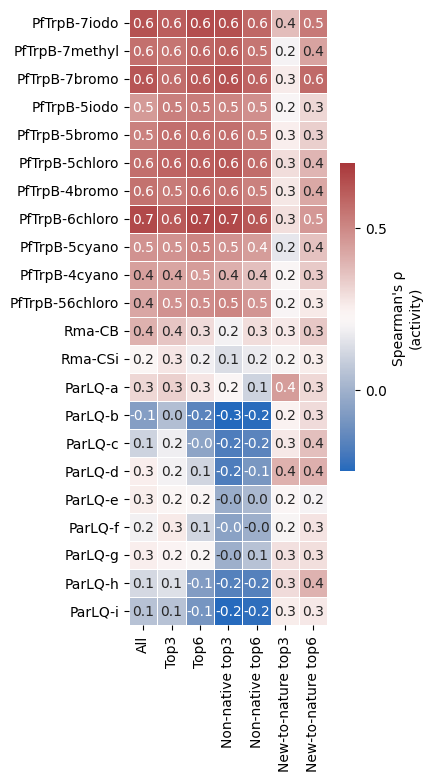

In [36]:

# Set the figure size
plt.figure(figsize=(3.2, 8))
# Create a heatmap
sns.heatmap(
    ensemble_df
    .set_index("Library")
    .reindex(LIB_ORDER),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Spearman's ρ\n(activity)", "ticks": [0, 0.5], "shrink": 0.5},
    vmin=-0.25,
    vmax=0.7
)
# take away y label
plt.ylabel("")
# Show the plot
# plt.title("ZS Summary: Spearman correlation")
plt.savefig("figs/zs_naivecomb_fit_rho_all.svg", format="svg", dpi=300, bbox_inches="tight")

In [10]:
ensemble_df = ensemble_df.set_index("Library")
ensemble_df

NameError: name 'ensemble_df' is not defined

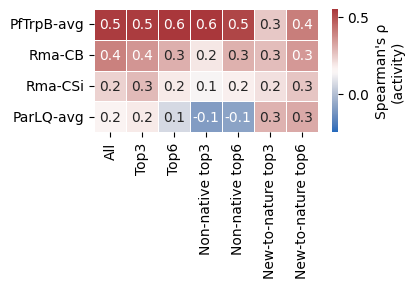

In [40]:
groups = {
    "PfTrpB-avg": [c for c in LIB_ORDER if c.startswith("PfTrpB")],
    "ParLQ-avg": [c for c in LIB_ORDER if c.startswith("ParLQ")],
}

for new_row, rows in groups.items():
    ensemble_df.loc[new_row] = ensemble_df.loc[rows].mean()

# Set the figure size
plt.figure(figsize=(3.6, 1.6))
# Create a heatmap
sns.heatmap(
    ensemble_df.loc[["PfTrpB-avg", "Rma-CB", "Rma-CSi", "ParLQ-avg"]],
    # .reindex(LIB_ORDER),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Spearman's ρ\n(activity)", "ticks": [0, 0.5]},
    vmin=-0.25,
    vmax=0.55
)
# take away y label
plt.ylabel("")
# Show the plot
# plt.title("ZS Summary: Spearman correlation")
plt.savefig("figs/zs_naivecomb_fit_rho.svg", format="svg", dpi=300, bbox_inches="tight")

In [11]:

# Define the ranking function
def compute_all_spearman(df, y_true, order_dict, prefix):
    """
    Compute Spearman correlation for rankings from Top1 to All.

    Args:
        df (pd.DataFrame): DataFrame with ranked feature scores.
        y_true (np.array): True fitness values.
        order_dict (dict): Dictionary defining feature ranking order.
        prefix (str): Name prefix (e.g., "All", "Non-native", "New-to-nature").

    Returns:
        dict: Spearman correlation scores for Top1 to All.
    """
    scores = {}
    feature_list = list(order_dict.keys())
    for i in range(1, len(feature_list) + 1):  # Incremental ranking (Top1 to All)
        top_n_features = feature_list[:i]
        y_pred = df[top_n_features].sum(axis=1)
        scores[f"{prefix} top{i}"] = spearmanr(y_true, y_pred)[0]
    return scores

# Store ensemble scores
ensemble_scores = []

for f in sorted(glob("/disk2/fli/REVIVAL2/zs/comb/minimal/*.csv")):
    lib_name = get_file_name(f)
    if lib_name == "ParLQ":
        lib_name = "ParLQ-a"

    df = pd.read_csv(f).fillna(0)  # Replace NaNs with 0

    # Convert non-fitness columns to ranking
    for c in df.columns:
        if c != "fitness":
            df[c] = df[c].rank()

    # Compute Spearman scores
    y_true = df["fitness"].values
    navie_scores = compute_all_spearman(df, y_true, mean_order, "All")
    non_native_scores = compute_all_spearman(df, y_true, non_native_order, "Non-native")
    new2nature_scores = compute_all_spearman(df, y_true, new2nature_order, "New-to-nature")


    # Save results
    ensemble_scores.append(
        {
            "Library": lib_name,
            **navie_scores,
            **non_native_scores,
            **new2nature_scores,
        }
    )

# Convert to DataFrame
ensemble_df = pd.DataFrame(ensemble_scores)
ensemble_df

,Library,All top1,All top2,All top3,All top4,All top5,All top6,All top7,All top8,All top9,...,New-to-nature top7,New-to-nature top8,New-to-nature top9,New-to-nature top10,New-to-nature top11,New-to-nature top12,New-to-nature top13,New-to-nature top14,New-to-nature top15,New-to-nature top16
0,ParLQ-a,0.064764,0.306634,0.325853,0.331351,0.302977,0.280015,0.219354,0.187635,0.143340,...,0.244583,0.253175,0.281884,0.203092,0.236316,0.220394,0.231295,0.206833,0.163442,0.144978
1,ParLQ-b,0.069212,0.196330,0.039961,-0.067198,-0.074650,-0.156358,-0.153629,-0.206971,-0.206977,...,0.257909,0.196962,0.128900,0.149988,0.065625,-0.029137,-0.027023,-0.128481,-0.133797,-0.176402
2,ParLQ-c,0.109442,0.297884,0.182499,0.050051,0.009166,-0.042341,-0.063053,-0.114392,-0.079633,...,0.398611,0.350838,0.273825,0.320432,0.220044,0.099922,0.050629,-0.022520,-0.044307,-0.076885
3,ParLQ-d,0.071439,0.359845,0.191657,0.055687,0.113517,0.113440,0.119157,0.046418,0.068690,...,0.427903,0.433281,0.340776,0.369055,0.278600,0.249086,0.224277,0.163088,0.151987,0.107662
4,ParLQ-e,0.003063,0.292459,0.226200,0.163244,0.228710,0.211904,0.212627,0.144845,0.136036,...,0.200823,0.248557,0.241138,0.255477,0.220499,0.226274,0.204685,0.175343,0.161327,0.124792
5,ParLQ-f,0.187746,0.367588,0.266012,0.165191,0.161913,0.113152,0.134547,0.064686,0.064533,...,0.307304,0.277920,0.256462,0.275262,0.216220,0.163985,0.169650,0.120435,0.105584,0.072863
6,ParLQ-g,0.127933,0.325122,0.236302,0.186670,0.206113,0.213178,0.227701,0.168279,0.141745,...,0.277445,0.291869,0.261256,0.277245,0.270414,0.250170,0.234480,0.207584,0.193607,0.167712
7,ParLQ-h,0.052008,0.266398,0.139833,0.060935,0.003830,-0.071629,-0.084292,-0.142811,-0.161199,...,0.374981,0.237008,0.173700,0.192422,0.177978,0.071781,0.072545,0.003185,-0.030905,-0.075522
8,ParLQ-i,-0.070933,0.178256,0.052806,-0.063658,-0.056181,-0.094955,-0.085280,-0.156963,-0.132693,...,0.288244,0.210523,0.131473,0.176746,0.088560,0.022879,0.028962,-0.000709,-0.031956,-0.081749
9,PfTrpB-4bromo,0.474594,0.463090,0.533105,0.562222,0.560550,0.571519,0.548337,0.548854,0.563756,...,0.452197,0.493008,0.518502,0.490417,0.521224,0.537312,0.553087,0.555594,0.553959,0.554139


Text(270.72222222222223, 0.5, '')

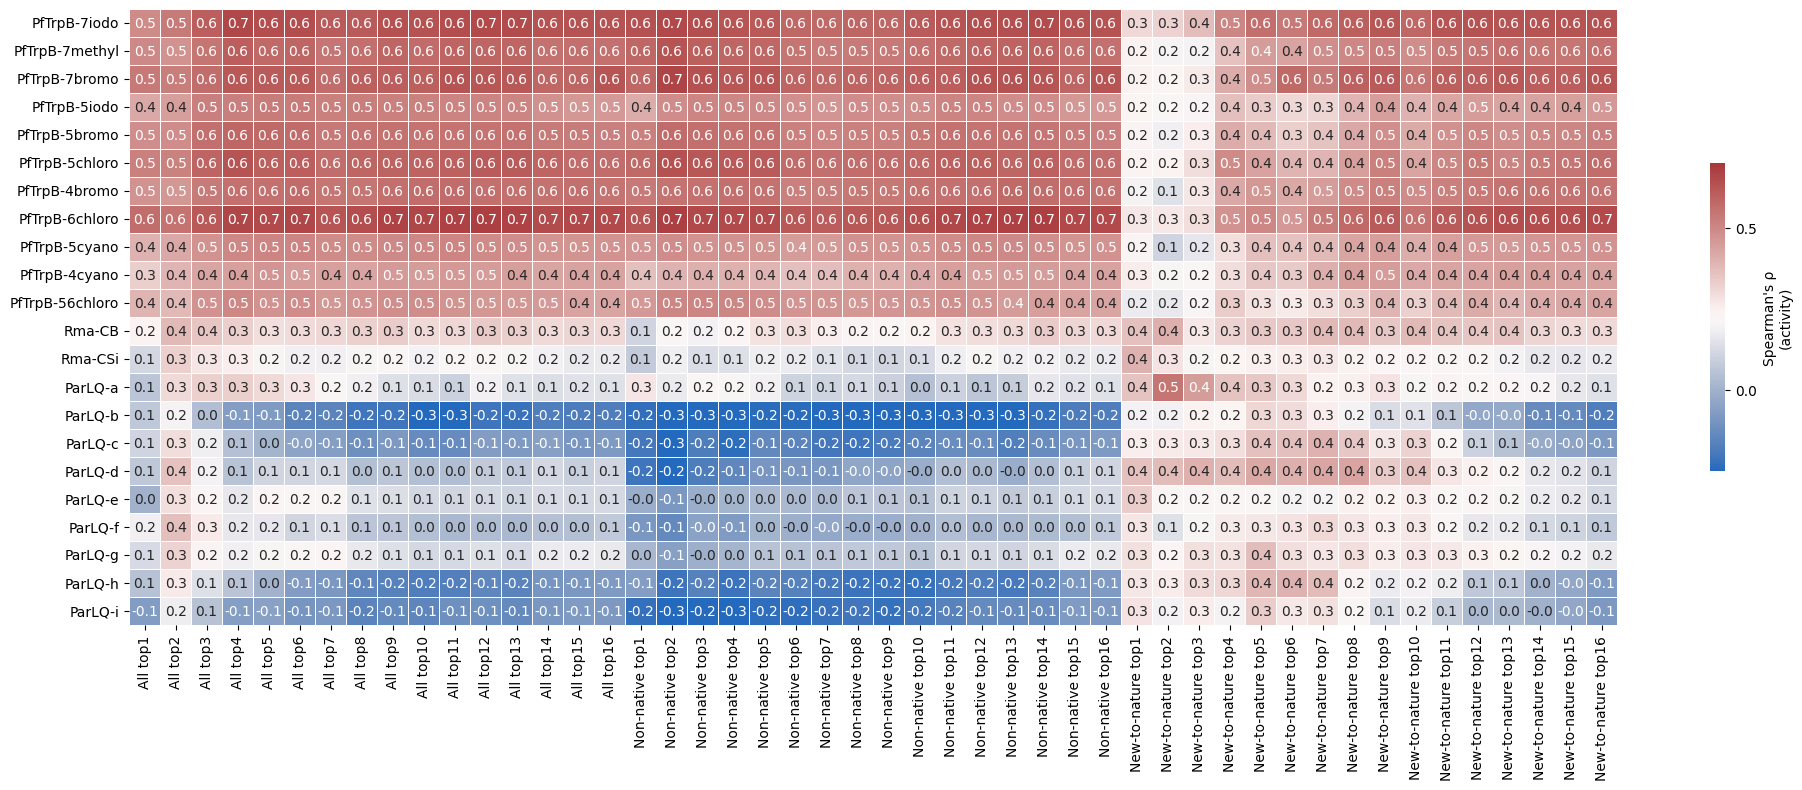

In [12]:

# Set the figure size
plt.figure(figsize=(24, 8))
# Create a heatmap
sns.heatmap(
    ensemble_df
    .set_index("Library")
    .reindex(LIB_ORDER),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Spearman's ρ\n(activity)", "ticks": [0, 0.5], "shrink": 0.5},
    vmin=-0.25,
    vmax=0.7
)
# take away y label
plt.ylabel("")
# Show the plot
# plt.title("ZS Summary: Spearman correlation")

In [18]:
len(ensemble_df.iloc[:, 1:].mean().sort_values(ascending=False)[:34])

34

Text(270.72222222222223, 0.5, '')

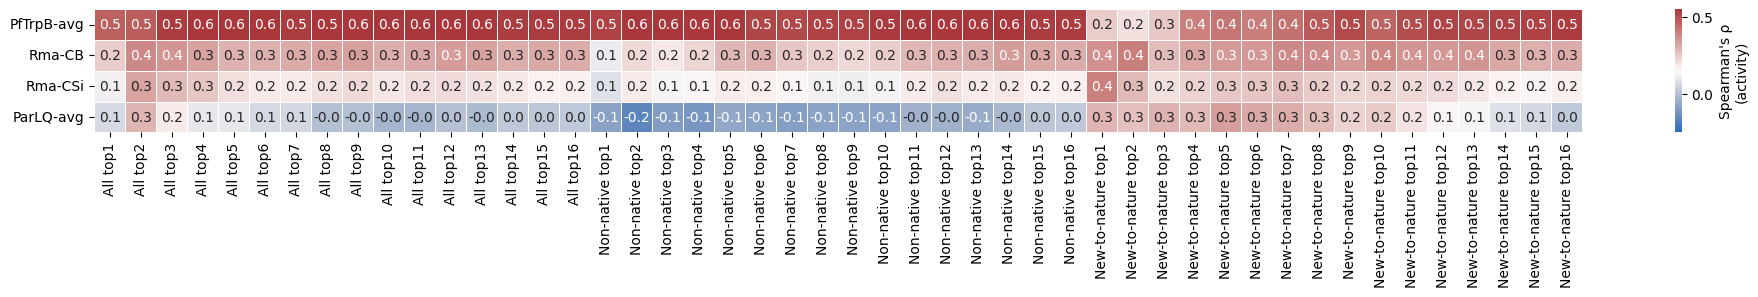

In [20]:
groups = {
    "PfTrpB-avg": [c for c in LIB_ORDER if c.startswith("PfTrpB")],
    "ParLQ-avg": [c for c in LIB_ORDER if c.startswith("ParLQ")],
}

ensemble_df = ensemble_df.set_index("Library")

for new_row, rows in groups.items():
    ensemble_df.loc[new_row] = ensemble_df.loc[rows].mean()

# Set the figure size
plt.figure(figsize=(24, 1.6))
# Create a heatmap
sns.heatmap(
    ensemble_df.loc[["PfTrpB-avg", "Rma-CB", "Rma-CSi", "ParLQ-avg"]],
    # .reindex(LIB_ORDER),
    cmap="vlag",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "Spearman's ρ\n(activity)", "ticks": [0, 0.5]},
    vmin=-0.25,
    vmax=0.55
)
# take away y label
plt.ylabel("")
# Show the plot
# plt.title("ZS Summary: Spearman correlation")
